### ANALYSING THE TRAFFIC DEMOGRAPHICS IN THE UK - Data Cleansing/ Pre-processing

Richard Abraham

In [1]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To make all outputs show
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
file_1= 'C:/Users/Admin/Desktop/BDA 106/Project/NEW_Dataset/Accident_Information.csv'
file_2= 'C:/Users/Admin/Desktop/BDA 106/Project/NEW_Dataset/Vehicle_Information.csv'

report_1 = pd.read_csv(file_1, index_col = 0, low_memory = False)
report_2 = pd.read_csv(file_2, encoding = 'unicode_escape', index_col = 0, low_memory = False)

In [3]:
# report_1.head(3)
# report_2.head(3)

In [4]:
# Inner merge the 2 files into 1 dataset (on Accident_Index column)
dataset = report_1.merge(report_2, on='Accident_Index', how='inner')
dataset.head()

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
200501BS00006,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005


In [5]:
# Getting rid of the accident index, as it is irrelevant to the analysis
dataset.reset_index(inplace = True, drop = True)
dataset.head()
dataset.shape

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005


(2058408, 56)

Data contains over 2 million records!

In [6]:
#let's take a general look at the variables involved
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058408 entries, 0 to 2058407
Data columns (total 56 columns):
1st_Road_Class                                 object
1st_Road_Number                                float64
2nd_Road_Class                                 object
2nd_Road_Number                                float64
Accident_Severity                              object
Carriageway_Hazards                            object
Date                                           object
Day_of_Week                                    object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                               object
Junction_Detail                                object
Latitude                                       float64
Light_Conditions                               object
Local_Authority_(District)                     object
Local_Authority_(Highway)                      object
Location_Easting_OSGR                          float64
Location_Northing_

In [7]:
#let's take a closer look at nulls within columns
null_columns=dataset.columns[dataset.isnull().any()]
dataset[null_columns].isnull().sum() 

1st_Road_Number                                     1
2nd_Road_Class                                 827937
2nd_Road_Number                                 18927
Did_Police_Officer_Attend_Scene_of_Accident       114
Latitude                                          124
Location_Easting_OSGR                             124
Location_Northing_OSGR                            124
Longitude                                         125
LSOA_of_Accident_Location                      139207
Pedestrian_Crossing-Human_Control                 654
Pedestrian_Crossing-Physical_Facilities          1370
Speed_limit                                        65
Time                                              146
InScotland                                         44
Age_of_Vehicle                                 337962
Driver_IMD_Decile                              689290
Engine_Capacity_.CC.                           250317
make                                           110845
model                       

Accident_severity has no null values , which is great because that is our target variable.

We will need to drop variables that are unnecessary:
-since we have latitude and longitude, the following are redundant:
    -1st_Road_Number
    -2nd_Road_Number
    -LSOA_of_Accident_Location
    -Location_Easting_OSGR
    -Location_Northing_OSGR

We will need to drop variables that mostly contain missing values:
    -2nd_Road_Class
    -Driver_IMD_Decile

For variables that contain only a few missing values, we can either drop those records or replace them.
Let's drop for now.
(Typically, we would substitute numeric nulls with mean/median/mode.
However, given the low volume of nulls and our need to make accurate recommendations to the UK government with as little assumptions as possible, we can safely drop records that still contain nulls.)

In [6]:
#drop variables that are unnecessary
dataset.drop("1st_Road_Number", axis=1, inplace=True)
dataset.drop("2nd_Road_Number", axis=1, inplace=True)
dataset.drop("LSOA_of_Accident_Location", axis=1, inplace=True)
dataset.drop("Location_Easting_OSGR", axis=1, inplace=True)
dataset.drop("Location_Northing_OSGR", axis=1, inplace=True)

In [7]:
dataset.shape

(2058408, 51)

In [8]:
#drop variables that mostly contain missing values

dataset.drop("2nd_Road_Class", axis=1, inplace=True)
dataset.drop("Driver_IMD_Decile", axis=1, inplace=True)

In [9]:
dataset.shape

(2058408, 49)

In [10]:
dataset.dropna(how='any',inplace=True)

In [11]:
dataset.shape

(1555129, 49)

Even though about a quarter or our records were dropped, we are still left with 1.5 million records to analyze. This is still a significant amount of data for the purpose of our analysis.
Now that our data is clean of nulls, let's examine it in further detail.

In [12]:
dataset.head()

,1st_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
2,A,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
4,Unclassified,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.515540,Daylight,...,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005
5,Unclassified,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.515540,Daylight,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Motorcycle 125cc and under,No,Did not impact,2005
7,C,Slight,None,2005-01-13,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,...,None,No tow/articulation,Did not leave carriageway,0.0,Parked,2,Car,No,Back,2005
8,A,Slight,None,2005-01-14,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.502260,Daylight,...,None,No tow/articulation,Nearside,0.0,Going ahead other,1,Car,No,Front,2005


Let us look further into some of the categorical data to see if they make sense!

In [69]:
dataset["1st_Road_Class"].unique()  #unknowns: 'Unclassified'
dataset["Accident_Severity"].unique() #need to reclassify into binary variable for model simplification
dataset["Carriageway_Hazards"].unique() #unknowns: 'Data missing or out of range'
#dataset["Date"].unique()
dataset["Day_of_Week"].unique()
dataset["Junction_Control"].unique() #unknowns: 'Data missing or out of range'
dataset["Junction_Detail"].unique() #unknowns: 'Data missing or out of range'
dataset["Light_Conditions"].unique() #unknowns: 'Data missing or out of range'
dataset["Local_Authority_(District)"].unique() #too many categories! might be unnecessary
dataset["Local_Authority_(Highway)"].unique() #too many categories! might be unnecessary
dataset["Police_Force"].unique()
dataset["Road_Surface_Conditions"].unique() #unknowns: 'Data missing or out of range'
dataset["Road_Type"].unique() #unknowns: 'Unknown'
dataset["Special_Conditions_at_Site"].unique() #unknowns: 'Data missing or out of range'
#dataset["Time"].unique()
dataset["Urban_or_Rural_Area"].unique() #unknowns: 'Unallocated' ... is that really unknown?
dataset["Weather_Conditions"].unique() #unknowns: 'Other', 'Unknown','Data missing or out of range'
dataset["InScotland"].unique() #might be an unnecessary location column
dataset["Age_Band_of_Driver"].unique() #unknowns/non-sensical data: 'Data missing or out of range','11 - 15','6 - 10', '0 - 5'
dataset["Driver_Home_Area_Type"].unique() #unknowns: 'Data missing or out of range'
dataset["Hit_Object_in_Carriageway"].unique() #unknowns: 'Data missing or out of range'
dataset["Hit_Object_off_Carriageway"].unique() #unknowns: 'Data missing or out of range'
dataset["Journey_Purpose_of_Driver"].unique() #unknowns: 'Other/Not known (2005-10)','Data missing or out of range','Not known','Other'
dataset["Junction_Location"].unique() #unknowns: 'Data missing or out of range'
dataset["make"].unique() #too many categories!
dataset["model"].unique() #too many categories!
dataset["Propulsion_Code"].unique()
dataset["Sex_of_Driver"].unique() #unknowns: 'Not known', 'Data missing or out of range'
dataset["Skidding_and_Overturning"].unique() #unknowns: 'Data missing or out of range'
dataset["Towing_and_Articulation"].unique() #unknowns: 'Data missing or out of range'
dataset["Vehicle_Leaving_Carriageway"].unique() #unknowns: 'Data missing or out of range'
dataset["Vehicle_Manoeuvre"].unique() #unknowns: 'Data missing or out of range'
dataset["Vehicle_Type"].unique()
dataset["Was_Vehicle_Left_Hand_Drive"].unique() #unknowns: 'Data missing or out of range'
dataset["X1st_Point_of_Impact"].unique() #unknowns: 'Data missing or out of range'

array(['A', 'Unclassified', 'C', 'B', 'Motorway', 'A(M)'], dtype=object)

array(['Slight', 'Serious', 'Fatal'], dtype=object)

array(['None', 'Other object on road',
       'Pedestrian in carriageway - not injured', 'Previous accident',
       'Vehicle load on road',
       'Any animal in carriageway (except ridden horse)',
       'Data missing or out of range'], dtype=object)

array(['Friday', 'Tuesday', 'Thursday', 'Sunday', 'Saturday', 'Wednesday',
       'Monday'], dtype=object)

array(['Data missing or out of range', 'Give way or uncontrolled',
       'Auto traffic signal', 'Stop sign', 'Authorised person',
       'Not at junction or within 20 metres'], dtype=object)

array(['Not at junction or within 20 metres', 'T or staggered junction',
       'Crossroads', 'Mini-roundabout', 'Private drive or entrance',
       'More than 4 arms (not roundabout)', 'Roundabout',
       'Other junction', 'Slip road', 'Data missing or out of range'],
      dtype=object)

array(['Daylight', 'Darkness - lights lit', 'Darkness - lights unlit',
       'Darkness - lighting unknown', 'Darkness - no lighting',
       'Data missing or out of range'], dtype=object)

array(['Kensington and Chelsea', 'Hammersmith and Fulham', 'Westminster',
       'City of London', 'Hackney', 'Islington', 'Camden', 'Brent',
       'Haringey', 'Barnet', 'Richmond upon Thames', 'Ealing',
       'Tower Hamlets', 'Hillingdon', 'London Airport (Heathrow)',
       'Hounslow', 'Waltham Forest', 'Redbridge', 'Barking and Dagenham',
       'Newham', 'Havering', 'Lambeth', 'Southwark', 'Croydon',
       'Wandsworth', 'Lewisham', 'Bromley', 'Bexley', 'Harrow',
       'Greenwich', 'Enfield', 'Kingston upon Thames', 'Merton', 'Sutton',
       'South Lakeland', 'Barrow-in-Furness', 'Carlisle', 'Eden',
       'Allerdale', 'Copeland', 'Blackpool', 'Fylde', 'Lancaster',
       'Blackburn with Darwen', 'Preston', 'Wyre', 'West Lancashire',
       'South Ribble', 'Chorley', 'Hyndburn', 'Ribble Valley', 'Pendle',
       'Rossendale', 'Burnley', 'Wirral', 'Sefton', 'Knowsley',
       'Liverpool', 'St. Helens', 'Manchester', 'Salford', 'Rochdale',
       'Trafford', 'Stockport', 'Wigan',

array(['Kensington and Chelsea', 'Hammersmith and Fulham', 'Westminster',
       'City of London', 'Hackney', 'Islington', 'Camden', 'Brent',
       'Haringey', 'Barnet', 'Richmond upon Thames', 'Ealing',
       'Tower Hamlets', 'Hillingdon', 'London Airport (Heathrow)',
       'Hounslow', 'Waltham Forest', 'Redbridge', 'Barking and Dagenham',
       'Newham', 'Havering', 'Lambeth', 'Southwark', 'Croydon',
       'Wandsworth', 'Lewisham', 'Bromley', 'Bexley', 'Harrow',
       'Greenwich', 'Enfield', 'Kingston upon Thames', 'Merton', 'Sutton',
       'Cumbria', 'Blackpool', 'Lancashire', 'Blackburn with Darwen',
       'Wirral', 'Sefton', 'Knowsley', 'Liverpool', 'St. Helens',
       'Manchester', 'Salford', 'Rochdale', 'Trafford', 'Stockport',
       'Wigan', 'Tameside', 'Bolton', 'Bury', 'Oldham', 'Warrington',
       'Cheshire East', 'Halton', 'Cheshire West and Chester',
       'Newcastle upon Tyne', 'Sunderland', 'North Tyneside',
       'Northumberland', 'South Tyneside', 'Gateshe

array(['Metropolitan Police', 'City of London', 'Cumbria', 'Lancashire',
       'Merseyside', 'Greater Manchester', 'Cheshire', 'Northumbria',
       'Durham', 'North Yorkshire', 'West Yorkshire', 'South Yorkshire',
       'Humberside', 'Cleveland', 'West Midlands', 'Staffordshire',
       'West Mercia', 'Warwickshire', 'Derbyshire', 'Nottinghamshire',
       'Lincolnshire', 'Leicestershire', 'Northamptonshire',
       'Cambridgeshire', 'Norfolk', 'Suffolk', 'Bedfordshire',
       'Hertfordshire', 'Essex', 'Thames Valley', 'Hampshire', 'Surrey',
       'Kent', 'Sussex', 'Devon and Cornwall', 'Avon and Somerset',
       'Gloucestershire', 'Wiltshire', 'Dorset', 'North Wales', 'Gwent',
       'South Wales', 'Dyfed-Powys', 'Northern', 'Grampian', 'Tayside',
       'Fife', 'Lothian and Borders', 'Central', 'Strathclyde',
       'Dumfries and Galloway'], dtype=object)

array(['Dry', 'Wet or damp', 'Snow', 'Frost or ice',
       'Flood over 3cm. deep', 'Data missing or out of range'],
      dtype=object)

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

array(['None', 'Oil or diesel', 'Auto signal part defective', 'Roadworks',
       'Road surface defective', 'Auto traffic signal - out',
       'Road sign or marking defective or obscured', 'Mud',
       'Data missing or out of range'], dtype=object)

array(['Urban', 'Rural', 'Unallocated'], dtype=object)

array(['Fine no high winds', 'Raining no high winds',
       'Snowing no high winds', 'Fine + high winds', 'Other', 'Unknown',
       'Raining + high winds', 'Fog or mist', 'Snowing + high winds',
       'Data missing or out of range'], dtype=object)

array(['No', 'Yes'], dtype=object)

array(['46 - 55', '26 - 35', '36 - 45', '66 - 75', '16 - 20', '56 - 65',
       'Data missing or out of range', '21 - 25', 'Over 75', '11 - 15',
       '6 - 10', '0 - 5'], dtype=object)

array(['Urban area', 'Data missing or out of range', 'Small town',
       'Rural'], dtype=object)

array(['None', 'Bollard or refuge', 'Open door of vehicle', 'Kerb',
       'Parked vehicle', 'Previous accident', 'Other object',
       'Road works', 'Central island of roundabout', 'Bridge (side)',
       'Any animal (except ridden horse)', 'Bridge (roof)',
       'Data missing or out of range'], dtype=object)

array(['None', 'Road sign or traffic signal', 'Other permanent object',
       'Lamp post', 'Central crash barrier', 'Near/Offside crash barrier',
       'Tree', 'Bus stop or bus shelter', 'Entered ditch',
       'Telegraph or electricity pole', 'Submerged in water',
       'Data missing or out of range', 'Wall or fence'], dtype=object)

array(['Other/Not known (2005-10)', 'Journey as part of work',
       'Commuting to/from work', 'Pupil riding to/from school',
       'Taking pupil to/from school', 'Data missing or out of range',
       'Not known', 'Other'], dtype=object)

array(['Not at or within 20 metres of junction',
       'Approaching junction or waiting/parked at junction approach',
       'Mid Junction - on roundabout or on main road',
       'Cleared junction or waiting/parked at junction exit',
       'Leaving roundabout', 'Entering main road',
       'Entering from slip road', 'Leaving main road',
       'Entering roundabout', 'Data missing or out of range'],
      dtype=object)

array(['NISSAN', 'AUDI', 'PIAGGIO', 'MERCEDES', 'JAGUAR', 'FORD', 'MCC',
       'BMW', 'PEUGEOT', 'HONDA', 'VAUXHALL', 'ROVER', 'LOTUS', 'SUZUKI',
       'SAAB', 'LONDON TAXIS INT', 'SUBARU', 'KAWASAKI', 'HYUNDAI',
       'LAND ROVER', 'VOLKSWAGEN', 'CITROEN', 'MINI', 'DUCATI', 'DAEWOO',
       'FIAT', 'METROCAB', 'YAMAHA', 'GILERA', 'RENAULT', 'MITSUBISHI',
       'TOYOTA', 'BUELL', 'TRIUMPH', 'PORSCHE', 'VOLVO', 'JEEP',
       'ASTON MARTIN', 'ALFA ROMEO', 'MG', 'TVR', 'SEAT', 'KIA',
       'CHRYSLER', 'SMART', 'SKODA', 'TAIWAN GOLDEN BEE', 'TAISHAN',
       'PROTON', 'MAZDA', 'HARLEY-DAVIDSON', 'KYMCO', 'LEXUS', 'KTM',
       'ISUZU TRUCKS', 'MOTO ROMA', 'CCM', 'MALAGUTI', 'JIALING', 'SYM',
       'ISUZU', 'DAIHATSU', 'DAF TRUCKS', 'BRANSON', 'PGO', 'LDV',
       'BENTLEY', 'AUSTIN', 'LADA', 'AUTO-TRAIL', 'PERODUA', 'Z Y MOTOR',
       'HILLMAN', 'DATSUN', 'LEYLAND DAF', 'APRILIA', 'CAGIVA',
       'CHEVROLET GMC', 'ITALJET', 'BAOTIAN', 'MASERATI', 'MORRIS',
       'DAIMLER', 'OPEL'

array(['ALMERA SE AUTO', 'A4 SPORT CABRIOLET AUTO', 'VESPA ET4', ...,
       'FA XF95.430', 'DAILY 35 C14 MWB', 'STRALIS AD260S33Y/PS S-A'],
      dtype=object)

array(['Petrol', 'Heavy oil', 'Hybrid electric', 'Gas/Bi-fuel',
       'Petrol/Gas (LPG)', 'Gas', 'New fuel technology', 'Gas Diesel',
       'Electric diesel'], dtype=object)

array(['Female', 'Male', 'Not known', 'Data missing or out of range'],
      dtype=object)

array(['None', 'Skidded', 'Overturned', 'Skidded and overturned',
       'Data missing or out of range', 'Jackknifed',
       'Jackknifed and overturned'], dtype=object)

array(['No tow/articulation', 'Other tow', 'Single trailer',
       'Articulated vehicle', 'Caravan', 'Double or multiple trailer',
       'Data missing or out of range'], dtype=object)

array(['Did not leave carriageway', 'Nearside', 'Offside',
       'Straight ahead at junction', 'Offside on to central reservation',
       'Offside - crossed central reservation',
       'Offside on to centrl res + rebounded', 'Nearside and rebounded',
       'Offside and rebounded', 'Data missing or out of range'],
      dtype=object)

array(['Going ahead other', 'Moving off', 'Parked', 'Turning left',
       'Turning right', 'Overtaking moving vehicle - offside', 'U-turn',
       'Waiting to go - held up', 'Overtaking static vehicle - offside',
       'Waiting to turn right', 'Going ahead left-hand bend',
       'Changing lane to right', 'Slowing or stopping',
       'Changing lane to left', 'Reversing', 'Overtaking - nearside',
       'Going ahead right-hand bend', 'Waiting to turn left',
       'Data missing or out of range'], dtype=object)

array(['Car', 'Motorcycle 125cc and under', 'Motorcycle over 500cc',
       'Motorcycle over 125cc and up to 500cc', 'Taxi/Private hire car',
       'Motorcycle 50cc and under', 'Van / Goods 3.5 tonnes mgw or under',
       'Minibus (8 - 16 passenger seats)',
       'Goods 7.5 tonnes mgw and over', 'Goods over 3.5t. and under 7.5t',
       'Other vehicle', 'Bus or coach (17 or more pass seats)',
       'Agricultural vehicle', 'Motorcycle - unknown cc',
       'Goods vehicle - unknown weight', 'Electric motorcycle'],
      dtype=object)

array(['No', 'Yes', 'Data missing or out of range'], dtype=object)

array(['Front', 'Did not impact', 'Back', 'Offside', 'Nearside',
       'Data missing or out of range'], dtype=object)

We can see above that although we removed NULL values, most of the categorical columns still contain values that are not quite useful when making a prediction.

In [16]:
print("1st_Road_Class",":",(dataset["1st_Road_Class"]=='Unclassified').sum())
print("Carriageway_Hazards",":",(dataset["Carriageway_Hazards"]=='Data missing or out of range').sum())
print("Junction_Control",":",(dataset["Junction_Control"]=='Data missing or out of range').sum())
print("Junction_Detail",":",(dataset["Junction_Detail"]=='Data missing or out of range').sum())
print("Light_Conditions",":",(dataset["Light_Conditions"]=='Data missing or out of range').sum())
print("Road_Surface_Conditions",":",(dataset["Road_Surface_Conditions"]=='Data missing or out of range').sum())
print("Road_Type",":",(dataset["Road_Type"]=='Unknown').sum())
print("Special_Conditions_at_Site",":",(dataset["Special_Conditions_at_Site"]=='Data missing or out of range').sum())
print("Urban_or_Rural_Area",":",(dataset["Urban_or_Rural_Area"]=='Unallocated').sum())
print("Weather_Conditions",":",(dataset["Weather_Conditions"].isin(['Other','Unknown','Data missing or out of range'])).sum())
print("Age_Band_of_Driver",":",(dataset["Age_Band_of_Driver"].isin(['Data missing or out of range','11 - 15','6 - 10','0 - 5'])).sum())
print("Driver_Home_Area_Type",":",(dataset["Driver_Home_Area_Type"]=='Data missing or out of range').sum())
print("Hit_Object_in_Carriageway",":",(dataset["Hit_Object_in_Carriageway"]=='Data missing or out of range').sum())
print("Hit_Object_off_Carriageway",":",(dataset["Hit_Object_off_Carriageway"]=='Data missing or out of range').sum())
print("Journey_Purpose_of_Driver",":",(dataset["Journey_Purpose_of_Driver"].isin(['Other/Not known (2005-10)','Data missing or out of range','Not known','Other'])).sum())
print("Junction_Location",":",(dataset["Junction_Location"]=='Data missing or out of range').sum())
print("Sex_of_Driver",":",(dataset["Sex_of_Driver"].isin(['Not known','Data missing or out of range'])).sum())
print("Skidding_and_Overturning",":",(dataset["Skidding_and_Overturning"]=='Data missing or out of range').sum())
print("Towing_and_Articulation",":",(dataset["Towing_and_Articulation"]=='Data missing or out of range').sum())
print("Vehicle_Leaving_Carriageway",":",(dataset["Vehicle_Leaving_Carriageway"]=='Data missing or out of range').sum())
print("Vehicle_Manoeuvre",":",(dataset["Vehicle_Manoeuvre"]=='Data missing or out of range').sum())
print("Was_Vehicle_Left_Hand_Drive",":",(dataset["Was_Vehicle_Left_Hand_Drive"]=='Data missing or out of range').sum())
print("X1st_Point_of_Impact",":",(dataset["X1st_Point_of_Impact"]=='Data missing or out of range').sum())


1st_Road_Class : 412850
Carriageway_Hazards : 98
Junction_Control : 558205
Junction_Detail : 30
Light_Conditions : 9
Road_Surface_Conditions : 2022
Road_Type : 7320
Special_Conditions_at_Site : 110
Urban_or_Rural_Area : 15
Weather_Conditions : 58394
Age_Band_of_Driver : 107721
Driver_Home_Area_Type : 196154
Hit_Object_in_Carriageway : 95
Hit_Object_off_Carriageway : 19
Journey_Purpose_of_Driver : 1157832
Junction_Location : 1955
Sex_of_Driver : 41936
Skidding_and_Overturning : 109
Towing_and_Articulation : 167
Vehicle_Leaving_Carriageway : 66
Vehicle_Manoeuvre : 234
Was_Vehicle_Left_Hand_Drive : 5784
X1st_Point_of_Impact : 279


As with nulls, we will delete columns that contain mostly meaningless data. Otherwise, we will remove records with remaining meaningless values.

In [12]:
#drop variables that are unnecessary
dataset.drop("1st_Road_Class", axis=1, inplace=True)
dataset.drop("Junction_Control", axis=1, inplace=True)
dataset.drop("Journey_Purpose_of_Driver", axis=1, inplace=True)

In [13]:
dataset.shape

(1555129, 46)

In [14]:
#otherwise drop records with meaningless data
dataset=dataset[dataset["Carriageway_Hazards"]!='Data missing or out of range']
dataset=dataset[dataset["Junction_Detail"]!='Data missing or out of range']
dataset=dataset[dataset["Light_Conditions"]!='Data missing or out of range']
dataset=dataset[dataset["Road_Surface_Conditions"]!='Data missing or out of range']
dataset=dataset[dataset["Road_Type"]!='Unknown']
dataset=dataset[dataset["Special_Conditions_at_Site"]!='Data missing or out of range']
dataset=dataset[dataset["Urban_or_Rural_Area"]!='Unallocated']
dataset=dataset[~dataset["Weather_Conditions"].isin(['Other','Unknown','Data missing or out of range'])]
dataset=dataset[~dataset["Age_Band_of_Driver"].isin(['Data missing or out of range','11 - 15','6 - 10','0 - 5'])]
dataset=dataset[dataset["Driver_Home_Area_Type"]!='Data missing or out of range']
dataset=dataset[dataset["Hit_Object_in_Carriageway"]!='Data missing or out of range']
dataset=dataset[dataset["Hit_Object_off_Carriageway"]!='Data missing or out of range']
dataset=dataset[dataset["Junction_Location"]!='Data missing or out of range']
dataset=dataset[~dataset["Sex_of_Driver"].isin(['Not known','Data missing or out of range'])]
dataset=dataset[dataset["Skidding_and_Overturning"]!='Data missing or out of range']
dataset=dataset[dataset["Towing_and_Articulation"]!='Data missing or out of range']
dataset=dataset[dataset["Vehicle_Leaving_Carriageway"]!='Data missing or out of range']
dataset=dataset[dataset["Vehicle_Manoeuvre"]!='Data missing or out of range']
dataset=dataset[dataset["Was_Vehicle_Left_Hand_Drive"]!='Data missing or out of range']
dataset=dataset[dataset["X1st_Point_of_Impact"]!='Data missing or out of range']

In [15]:
dataset.shape

(1263105, 46)

In [75]:
#dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263105 entries, 2 to 2058407
Data columns (total 46 columns):
Accident_Severity                              1263105 non-null object
Carriageway_Hazards                            1263105 non-null object
Date                                           1263105 non-null object
Day_of_Week                                    1263105 non-null object
Did_Police_Officer_Attend_Scene_of_Accident    1263105 non-null float64
Junction_Detail                                1263105 non-null object
Latitude                                       1263105 non-null float64
Light_Conditions                               1263105 non-null object
Local_Authority_(District)                     1263105 non-null object
Local_Authority_(Highway)                      1263105 non-null object
Longitude                                      1263105 non-null float64
Number_of_Casualties                           1263105 non-null int64
Number_of_Vehicles               

In [16]:
#create a new target variable - Reduced target class from a multi-class classification to a binary classification 
# problem to handle the imbalanced dataset and simplify analysis
 

dataset.loc[dataset.Accident_Severity !='Slight', 'Target_Severe_Indicator'] = 1
dataset.loc[dataset.Accident_Severity =='Slight', 'Target_Severe_Indicator'] = 0

In [18]:
dataset["Target_Severe_Indicator"].value_counts()
dataset["Accident_Severity"].value_counts()

0.0    1084634
1.0     178471
Name: Target_Severe_Indicator, dtype: int64

Slight     1084634
Serious     162443
Fatal        16028
Name: Accident_Severity, dtype: int64

We see a slight improvement in the unique class counts

### Further cleansing and data transformations

In [17]:
# Create new column for time of day category

# Define a function that turns the hours into daytime groups

def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"
    
# slice first and second string from time column
dataset['Hour'] = dataset['Time'].str[0:2]

# convert new column to numeric datetype
dataset['Hour'] = pd.to_numeric(dataset['Hour'])

# drop null values in our new column
dataset = dataset.dropna(subset=['Hour'])

# cast to integer values
dataset['Hour'] = dataset['Hour'].astype('int')

# apply thus function to our temporary hour column
dataset['Daytime'] = dataset['Hour'].apply(when_was_it)
dataset[['Time', 'Hour', 'Daytime']].head(8)

,Time,Hour,Daytime
2,10:35,10,office hours (10-15)
4,12:40,12,office hours (10-15)
5,12:40,12,office hours (10-15)
7,20:40,20,evening (19-23)
8,17:35,17,afternoon rush (15-19)
9,00:42,0,night (23-5)
11,05:01,5,morning rush (5-10)
12,05:01,5,morning rush (5-10)


Can now use the dataset as is for descriptive analysis.. but will need to drop some variables before building a model

In [20]:
#drop Did_Police_Officer_Attend_Scene_of_Accident and Police_Force, as they are irrelevant. The dataset to begin
# with represents only those accidents reported by the police
dataset.drop("Did_Police_Officer_Attend_Scene_of_Accident", axis=1, inplace=True)
dataset.drop("Police_Force", axis=1, inplace=True)

#drop Time as Daytime is sufficient 
dataset.drop("Time", axis=1, inplace=True)


#drop Year_y as there is already a column called year_x containing the same info
dataset.drop("Year_y", axis=1, inplace=True)

In [22]:
#since 'model' is a more detailed version of 'make', drop 'model' and keep 'make'
dataset.drop("model", axis=1, inplace=True)

#we can drop inscotland, as the data contained in this column is higly skewed and will not proivde much info
dataset.drop("InScotland", axis=1, inplace=True)

#we can drop 'Vehicle_reference', due to high correlation with 'Number_of_Vehicles'
dataset.drop("Vehicle_Reference", axis=1, inplace=True)

#we can drop 'Local_Authority_(District)' since it is a more detailed version of 'Local_Authority_(Highway)'
dataset.drop("Local_Authority_(District)", axis=1, inplace=True)

In [20]:
dataset.shape

(1263105, 40)

In [23]:
#check correlation between 'Was_Vehicle_Left_Hand_Drive' and  'Target_Severe_Indicator'

dataset.loc[dataset['Was_Vehicle_Left_Hand_Drive'] == 'Yes', 'Was_Vehicle_Left_Hand_Drive_test'] = 1
dataset.loc[dataset['Was_Vehicle_Left_Hand_Drive'] == 'No', 'Was_Vehicle_Left_Hand_Drive_test'] = 0

x=dataset['Target_Severe_Indicator'].values
y=dataset['Was_Vehicle_Left_Hand_Drive_test'].values

np.corrcoef(x,y)

# Due to the low correlation with the target variable and high imbalance in values, we drop 'Was_Vehicle_Left_Hand_Drive'
dataset.drop("Was_Vehicle_Left_Hand_Drive", axis=1, inplace=True)

In [22]:
dataset.shape

(1263105, 39)

In [24]:
# change numeric values in pedestrian crossing variables to categoric
# Converting numerical values present in these columns to a more meaninful form using data obtained from the data_dictionary

dataset.loc[dataset['Pedestrian_Crossing-Human_Control'] ==0, 'Ped_Cross_Human'] = 'None within 50 metres'
dataset.loc[dataset['Pedestrian_Crossing-Human_Control'] ==1, 'Ped_Cross_Human'] = 'Control by school crossing patrol'
dataset.loc[dataset['Pedestrian_Crossing-Human_Control'] ==2, 'Ped_Cross_Human'] = 'Control by other authorised person'


dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==0, 'Ped_Cross_Physical'] = 'No physical crossing facilities within 50 metres'
dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==1, 'Ped_Cross_Physical'] = 'Zebra'
dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==4, 'Ped_Cross_Physical'] = 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing'
dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==5, 'Ped_Cross_Physical'] = 'Pedestrian phase at traffic signal junction'
dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==7, 'Ped_Cross_Physical'] = 'Footbridge or subway'
dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==8, 'Ped_Cross_Physical'] = 'Central refuge'

#and then we can drop the original pedestrian crossing variables
dataset.drop("Pedestrian_Crossing-Human_Control", axis=1, inplace=True)
dataset.drop("Pedestrian_Crossing-Physical_Facilities", axis=1, inplace=True)

In [24]:
dataset.shape

(1263105, 39)

In [32]:
#Change categorical variables with order to numeric
#dataset['Age_Band_of_Driver'].unique()

dataset.loc[dataset['Age_Band_of_Driver'] =='16 - 20', 'Age_Band_of_Driver_order'] = 1
dataset.loc[dataset['Age_Band_of_Driver'] =='21 - 25', 'Age_Band_of_Driver_order'] = 2
dataset.loc[dataset['Age_Band_of_Driver'] =='26 - 35', 'Age_Band_of_Driver_order'] = 3
dataset.loc[dataset['Age_Band_of_Driver'] =='36 - 45', 'Age_Band_of_Driver_order'] = 4
dataset.loc[dataset['Age_Band_of_Driver'] =='46 - 55', 'Age_Band_of_Driver_order'] = 5
dataset.loc[dataset['Age_Band_of_Driver'] =='56 - 65', 'Age_Band_of_Driver_order'] = 6
dataset.loc[dataset['Age_Band_of_Driver'] =='66 - 75', 'Age_Band_of_Driver_order'] = 7
dataset.loc[dataset['Age_Band_of_Driver'] =='Over 75', 'Age_Band_of_Driver_order'] = 8

dataset.drop("Age_Band_of_Driver", axis=1, inplace=True)

In [25]:
dataset.shape

(1263105, 39)

In [ ]:
eda_data_1=dataset.copy()

**Next we carry out some descriptive analysis, to gain insights about our data**

## EDA

### Time Series Analysis

#### Total Number of Accidents per Year

In [21]:
# Covert 'Date' to proper datetime format
eda_data_1['Date']= pd.to_datetime(eda_data_1['Date'], format="%Y-%m-%d")

In [45]:
eda_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263105 entries, 2 to 2058407
Data columns (total 49 columns):
Accident_Severity                              1263105 non-null object
Carriageway_Hazards                            1263105 non-null object
Date                                           1263105 non-null datetime64[ns]
Day_of_Week                                    1263105 non-null object
Did_Police_Officer_Attend_Scene_of_Accident    1263105 non-null float64
Junction_Detail                                1263105 non-null object
Latitude                                       1263105 non-null float64
Light_Conditions                               1263105 non-null object
Local_Authority_(District)                     1263105 non-null object
Local_Authority_(Highway)                      1263105 non-null object
Longitude                                      1263105 non-null float64
Number_of_Casualties                           1263105 non-null int64
Number_of_Vehicles       

In [32]:
# eda_data_1.iloc[:, 1:5].info()

In [22]:
# In general terms, the number of accidents have gone up over the years
eda_data_1["Year_x"].value_counts().sort_index()

2005     55737
2006     59637
2007     71151
2008     68520
2009    118301
2010    119198
2011    121976
2012    118715
2013    118227
2014    126653
2015    135839
2016    149151
Name: Year_x, dtype: int64

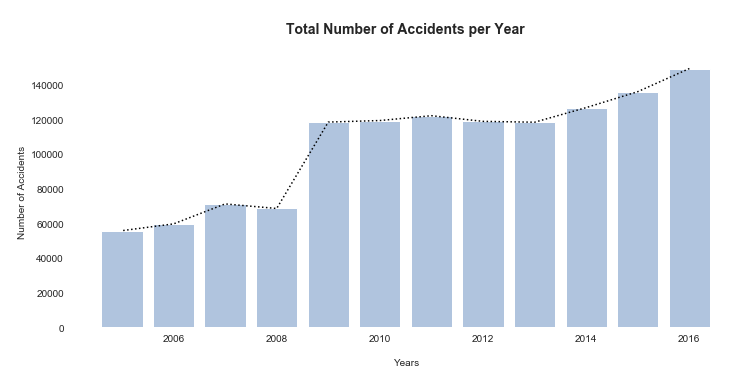

In [64]:
# Plotting Number of Accidents over the years

# Getting yearly count
yearly_count = eda_data_1['Date'].dt.year.value_counts().sort_index(ascending=False)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# plot
ax.bar(yearly_count.index, yearly_count.values, color='lightsteelblue')
ax.plot(yearly_count, linestyle=':', color='black')
ax.set_title('\nTotal Number of Accidents per Year\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nNumber of Accidents')
ax.set(xlabel='\nYears')
# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

#### Average Number of Accidents by Weekday

In [24]:
# Total number of accidents by day of the week
eda_data_1["Day_of_Week"].value_counts()

Friday       209735
Thursday     190929
Wednesday    190008
Tuesday      188080
Monday       178249
Saturday     167443
Sunday       138661
Name: Day_of_Week, dtype: int64

In [25]:
# Getting count of accidents on each day (from 2005 - 2016) - using timeseries data ('Date')
weekday_counts = pd.DataFrame(eda_data_1.set_index('Date').resample('1d').size().reset_index())

#weekday_counts - renaming columns
weekday_counts.columns = ['Date', 'Count']

#weekday - using timeseries data to get name of weekday
weekday = weekday_counts['Date'].dt.weekday_name


# Calculating average per weekday over the years (2005-2016)
weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages.set_index('Weekday', inplace=True)
weekday_averages

,Average_Accidents
Weekday,
Friday,335.039936
Monday,284.742812
Saturday,267.054226
Sunday,221.503195
Thursday,304.998403
Tuesday,300.447284
Wednesday,303.527157


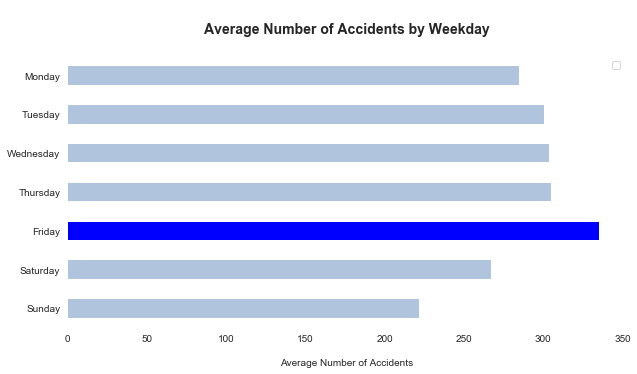

In [69]:
# Plotting the dataframe

# reorder the weekdays beginning with Monday (backwards because of printing behavior!)
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors=['lightsteelblue', 'lightsteelblue', 'blue', 'lightsteelblue', 
        'lightsteelblue', 'lightsteelblue', 'lightsteelblue']

# plot
weekday_averages.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Number of Accidents by Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Number of Accidents', ylabel='')
# ax.set(ylabel='\nDay of the Week')
ax.legend('')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

#### Number of Accidents by Day and Year

In [27]:
# Getting weekday and year
weekday = eda_data_1['Date'].dt.weekday_name
year    = eda_data_1['Date'].dt.year

# Grouping data by year and weekday
accident_table = eda_data_1.groupby([year, weekday]).size()


accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)
accident_table

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Year,,,,,,,
2005,6190,7518,9223,8394,8433,8216,7763
2006,6625,7951,10258,8841,9104,8742,8116
2007,8132,9543,11714,10476,10578,10515,10193
2008,7561,9101,11153,10074,10518,10420,9693
2009,13121,16172,19608,17629,17749,17793,16229
2010,12902,16233,19988,17660,17630,17778,17007
2011,13251,16223,20430,18982,18487,17633,16970
2012,12934,15550,19402,18225,18126,17577,16901
2013,12624,15547,19942,18179,17345,17946,16644


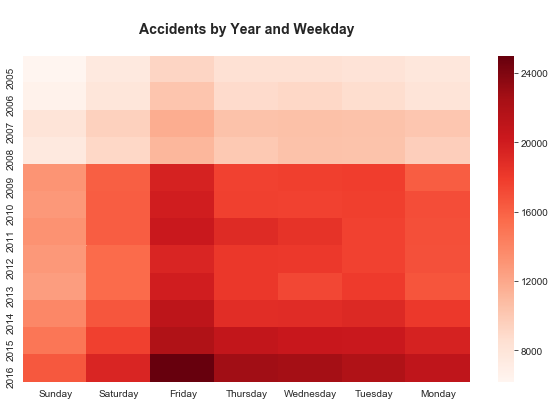

In [66]:
# Plotting dataframe
plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='Reds')
plt.title('\nAccidents by Year and Weekday\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

#### Proportion of Accident Severity

In [58]:
sub_df = eda_data_1[['Date','Accident_Severity']]

# pull out the year
year = sub_df['Date'].dt.year
week = sub_df['Date'].dt.week

# groupby year and severities
count_of_fatalities = sub_df.set_index('Date').groupby([pd.Grouper(freq='W'), 'Accident_Severity']).size()

# build a nice table
fatalities_table = count_of_fatalities.rename_axis(['Week', 'Accident_Severity'])\
                                      .unstack('Accident_Severity')\
                                      .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
fatalities_table.head()

Accident_Severity,Fatal,Serious,Slight
Week,,,
2005-01-02,3,25,117
2005-01-09,11,80,707
2005-01-16,12,142,932
2005-01-23,20,110,969
2005-01-30,7,106,906


In [59]:
fatalities_table['sum'] = fatalities_table.sum(axis=1)
fatalities_table = fatalities_table.join(fatalities_table.div(fatalities_table['sum'], axis=0), rsuffix='_percentage')
fatalities_table.head()

Accident_Severity,Fatal,Serious,Slight,sum,Fatal_percentage,Serious_percentage,Slight_percentage,sum_percentage
Week,,,,,,,,
2005-01-02,3,25,117,145,0.020690,0.172414,0.806897,1.0
2005-01-09,11,80,707,798,0.013784,0.100251,0.885965,1.0
2005-01-16,12,142,932,1086,0.011050,0.130755,0.858195,1.0
2005-01-23,20,110,969,1099,0.018198,0.100091,0.881711,1.0
2005-01-30,7,106,906,1019,0.006869,0.104024,0.889107,1.0


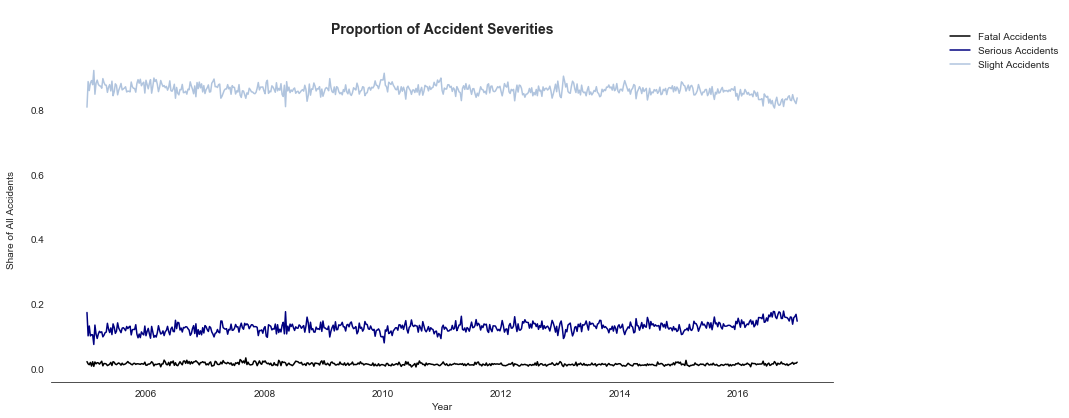

In [70]:
# prepare data
sub_df = fatalities_table[['Fatal_percentage', 'Serious_percentage', 'Slight_percentage']]

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))
colors=['black', 'navy', 'lightsteelblue']

# plot
sub_df.plot(color=colors, ax=ax)
ax.set_title('\nProportion of Accident Severities\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Share of All Accidents\n', xlabel='Year')
ax.legend(labels=['Fatal Accidents', 'Serious Accidents', 'Slight Accidents'], 
          bbox_to_anchor=(1.3, 1.1), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=False);

#### Accident Distribution per Day

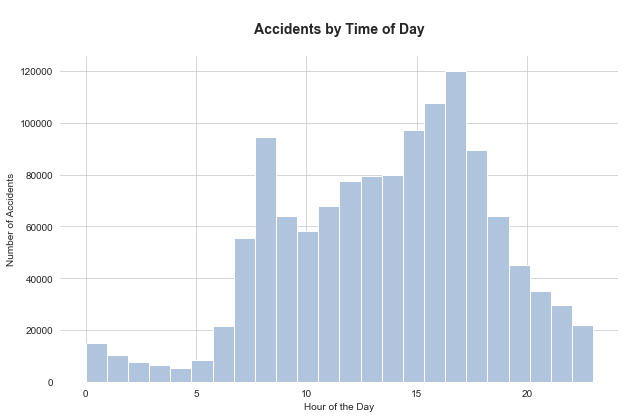

In [71]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
eda_data_1.Hour.hist(bins=24, ax=ax, color='lightsteelblue')
ax.set_title('\nAccidents by Time of Day\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Number of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

Count of accidents by 'Daytime' categories

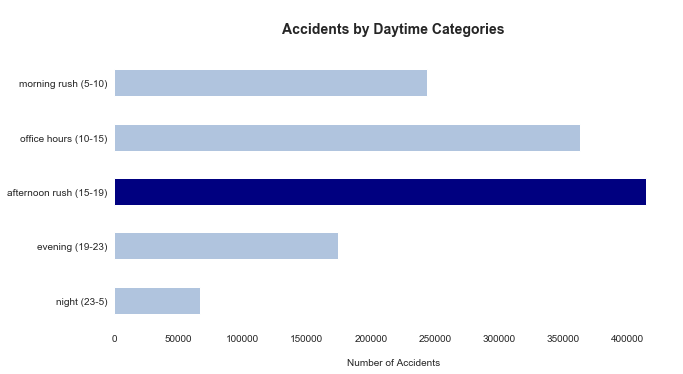

In [72]:
# prepare dataframe
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
df_sub = eda_data_1.groupby('Daytime').size().reindex(order)

# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 'lightsteelblue']

# plot
df_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAccidents by Daytime Categories\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of Accidents', ylabel='')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

#### Percentage Distributiong of Accident Severity

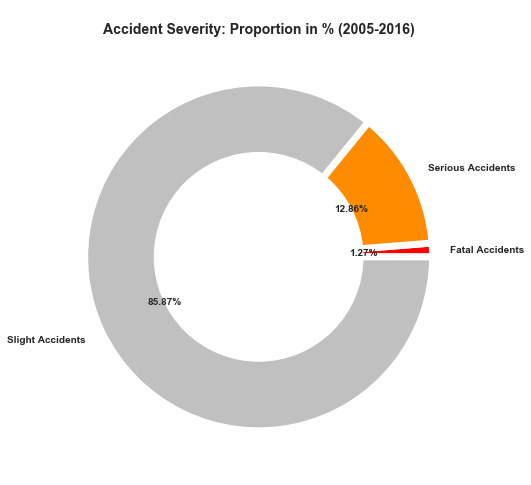

In [74]:
# assign the data
fatal   = eda_data_1.Accident_Severity.value_counts()['Fatal']
serious = eda_data_1.Accident_Severity.value_counts()['Serious']
slight  = eda_data_1.Accident_Severity.value_counts()['Slight']

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Proportion in % (2005-2016)', fontsize=14, fontweight='bold')
plt.show();

#### Share of accident sevirity by Daytime

In [75]:
# prepare dataframe with simple counts
counts = eda_data_1.groupby(['Daytime', 'Accident_Severity']).size()

counts = counts.rename_axis(['Daytime', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Daytime,,,
afternoon rush (15-19),4327,53330,356989
evening (19-23),2949,25268,145977
morning rush (5-10),2608,28436,212983
night (23-5),2056,11526,53310
office hours (10-15),4088,43883,315375


In [76]:
# prepare dataframe with shares
counts['sum'] = counts.sum(axis=1)
counts = counts.join(counts.div(counts['sum'], axis=0), rsuffix=' in %')
counts_share = counts.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)
counts_share

Accident_Severity,Fatal in %,Serious in %,Slight in %
Daytime,,,
afternoon rush (15-19),0.010435,0.128616,0.860949
evening (19-23),0.016929,0.145057,0.838014
morning rush (5-10),0.010687,0.116528,0.872785
night (23-5),0.030736,0.172308,0.796956
office hours (10-15),0.011251,0.120775,0.867974


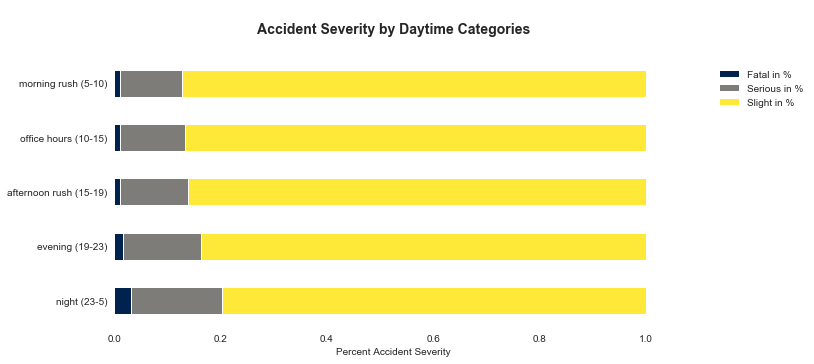

In [78]:
# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))

# plot
counts_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident Severity by Daytime Categories\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percent Accident Severity', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

#### Reason for Accidents

In [37]:
vehicle_ManoeuvreDF=eda_data_1["Vehicle_Manoeuvre"].value_counts()

In [38]:
vehicle_ManoeuvreDF

Going ahead other                      569219
Turning right                          138093
Slowing or stopping                    107931
Waiting to go - held up                101272
Going ahead right-hand bend             55635
Moving off                              50297
Going ahead left-hand bend              48474
Turning left                            39742
Parked                                  30488
Waiting to turn right                   24701
Overtaking moving vehicle - offside     23735
Reversing                               15082
Overtaking static vehicle - offside     14702
U-turn                                  10761
Changing lane to right                   9946
Changing lane to left                    9122
Waiting to turn left                     8277
Overtaking - nearside                    5628
Name: Vehicle_Manoeuvre, dtype: int64

In [70]:
print(type(vehicle_ManoeuvreDF))

<class 'pandas.core.series.Series'>


In [39]:
from pandas import Series, DataFrame
df=Series.to_frame(vehicle_ManoeuvreDF)

In [40]:
# df.columns = ['Count']

In [41]:
df.reset_index(level=0, inplace=True)

In [78]:
# list(df.columns.values)

['index', 'Count']

In [77]:
# df

,index,Count
0,Going ahead other,569219
1,Turning right,138093
2,Slowing or stopping,107931
3,Waiting to go - held up,101272
4,Going ahead right-hand bend,55635
5,Moving off,50297
6,Going ahead left-hand bend,48474
7,Turning left,39742
8,Parked,30488
9,Waiting to turn right,24701


In [42]:
df.columns = ['Vehicle_Manoeuvre', 'Count'] 

In [43]:
df

,Vehicle_Manoeuvre,Count
0,Going ahead other,569219
1,Turning right,138093
2,Slowing or stopping,107931
3,Waiting to go - held up,101272
4,Going ahead right-hand bend,55635
5,Moving off,50297
6,Going ahead left-hand bend,48474
7,Turning left,39742
8,Parked,30488
9,Waiting to turn right,24701


In [44]:
manoeuvre = df['Vehicle_Manoeuvre'].tolist()
count_manoeuvre = df['Count'].tolist()

In [45]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

Please refer to the image titled **"Vehicle manoeuvre at the time of accident.png"** in the Images folder.

In [79]:
pie_visual = go.Pie(labels=manoeuvre, values=count_manoeuvre, marker=dict(colors=['#25e475', '#ee1c96',]))

layout = go.Layout(title='Vehicle manoeuvre at the time of accident', width=800, height=500)
fig = go.Figure(data=[pie_visual], layout=layout)
iplot(fig)

#### Accidents categorized by gender & age_band of driver

In [90]:
eda_data_1['Sex_of_Driver'].value_counts()

Male      814339
Female    448766
Name: Sex_of_Driver, dtype: int64

In [47]:
df_gender_male =  eda_data_1['Sex_of_Driver']=='Male'
df_male=eda_data_1[df_gender_male]
df_male.head(3)

,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),...,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y,Target_Severe_Indicator,Hour,Daytime
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00006,Slight,None,2005-01-11,Tuesday,1.0,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,Kensington and Chelsea,...,0.0,Moving off,1,Car,No,Did not impact,2005,0.0,12,office hours (10-15)
200501BS00007,Slight,None,2005-01-13,Thursday,1.0,T or staggered junction,51.512695,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,...,0.0,Parked,2,Car,No,Back,2005,0.0,20,evening (19-23)
200501BS00009,Slight,None,2005-01-14,Friday,1.0,Not at junction or within 20 metres,51.502260,Daylight,Kensington and Chelsea,Kensington and Chelsea,...,0.0,Going ahead other,1,Car,No,Front,2005,0.0,17,afternoon rush (15-19)


In [48]:
df_gender_female =  eda_data_1['Sex_of_Driver']=='Female'
df_female=eda_data_1[df_gender_female]

In [49]:
maleDF=Series.to_frame(df_male['Age_Band_of_Driver'].value_counts())
femaleDF=Series.to_frame(df_female['Age_Band_of_Driver'].value_counts())

In [50]:
maleDF.reset_index(level=0, inplace=True)
maleDF.columns = ['Age_Band_of_Driver', 'Count']
maleDF.head(2)
femaleDF.reset_index(level=0, inplace=True)
femaleDF.columns = ['Age_Band_of_Driver', 'Count']
femaleDF.head(2)

,Age_Band_of_Driver,Count
0,26 - 35,178082
1,36 - 45,165115


,Age_Band_of_Driver,Count
0,26 - 35,102301
1,36 - 45,97546


In [51]:
male_age_band=maleDF['Age_Band_of_Driver'].tolist()
male_accident_count=maleDF['Count'].tolist()
female_age_band=femaleDF['Age_Band_of_Driver'].tolist()
female_accident_count=femaleDF['Count'].tolist()

Please refer to the image titled **"Accidents by gender and age band.png"** in the Images folder.

In [81]:
trace1 = go.Bar(
    x=male_age_band,
    y=male_accident_count,
    name='Male Drivers',
    marker=dict(color='#5e59f2'),
    opacity=0.8
)
trace2 = go.Bar(
    x=female_age_band,
    y=female_accident_count,
    name='Female Drivers',
    marker=dict(color='#F259D6'),
    opacity=0.8
)
data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    legend=dict(dict(x=-.1, y=1.2)),
    margin=dict(b=120),
    title = 'Accidents categorized by Gender and Age Group',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

plt.show()

#### Average number of casualities by Daytime

In [53]:
# Create a dictionary of Daytime groups
daytime_groups = {1: 'Morning (5-10)', 
                  2: 'Office Hours (10-15)', 
                  3: 'Afternoon Rush (15-19)', 
                  4: 'Evening (19-23)', 
                  5: 'Night(23-5)'}

In [54]:
labels = tuple(daytime_groups.values())

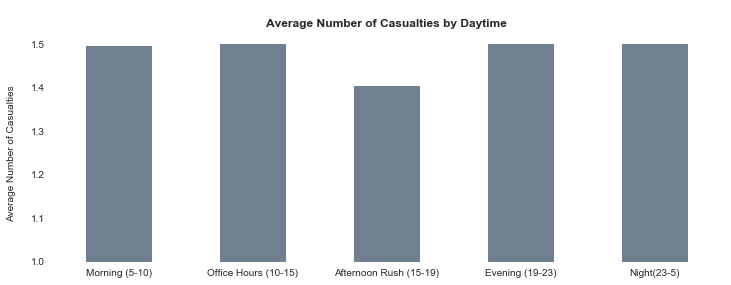

In [55]:
# plot average no. of casualties by daytime
eda_data_1.groupby('Daytime')['Number_of_Casualties'].mean().plot(kind='bar', color='slategrey', 
                                                                 figsize=(12,4), grid=False)
plt.xticks(np.arange(5), labels, rotation='horizontal')
plt.ylim((1,1.5))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Daytime\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

#### Average number of casualities by speed limit

In [56]:
eda_data_1.groupby('Speed_limit')['Number_of_Casualties'].mean()

Speed_limit
10.0    1.000000
15.0    1.166667
20.0    1.253647
30.0    1.375816
40.0    1.566714
50.0    1.658071
60.0    1.661390
70.0    1.822851
Name: Number_of_Casualties, dtype: float64

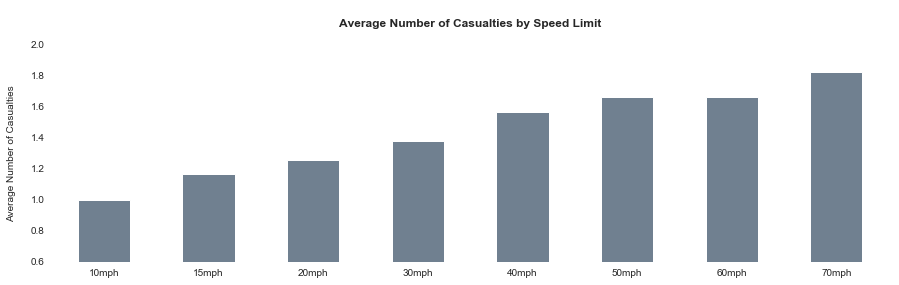

In [57]:
# check speed limit
eda_data_1.groupby('Speed_limit')['Number_of_Casualties'].mean().plot(kind='bar', color='slategrey', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(8), 
           ['10mph', '15mph', '20mph', '30mph', '40mph', '50mph', '60mph', '70mph'], 
           rotation='horizontal')
plt.ylim((0.6,2.0))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Speed Limit\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);